### Import modules

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import seaborn as sns
import qrcode
import matplotlib_inline
import os
import shutil

# Plotting style
plt.style.use("ggplot")
matplotlib.rcParams["mathtext.fontset"] = "cm"
matplotlib.rcParams["font.family"] = "STIXGeneral"
# Not italized latex
matplotlib.rcParams["mathtext.default"] = "regular"
matplotlib.rcParams["font.weight"] = "light"
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

# Define study
STUDY_NAME = "opt_flathv_75_1500_withBB_chroma5_eol_tune_intensity"

SAVE_STUDY_EOS = False


/tmp/ipykernel_2727916/701782569.py:6: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


## Function to add QR code to plot

In [2]:
# To add QR codes to plot
def add_QR_code(fig, link):
    # Add QR code pointing to the github repository
    qr = qrcode.QRCode(
        # version=None,
        box_size=10,
        border=1,
    )
    qr.add_data(link)
    qr.make(fit=False)
    im = qr.make_image(fill_color="black", back_color="transparent")
    newax = fig.add_axes([0.9, 0.9, 0.05, 0.05], anchor="NE", zorder=1)
    newax.imshow(im, resample=False, interpolation="none", filternorm=False)
    # Add link below qrcode
    newax.plot([0, 0], [0, 0], color="white", label="link")
    text = newax.annotate(
        "lin",
        xy=(0, 300),
        xytext=(0, 300),
        fontsize=30,
        url=link,
        bbox=dict(color="white", alpha=1e-6, url=link),
        alpha=0,
    )
    # Hide X and Y axes label marks
    newax.xaxis.set_tick_params(labelbottom=False)
    newax.yaxis.set_tick_params(labelleft=False)
    # Hide X and Y axes tick marks
    newax.set_xticks([])
    newax.set_yticks([])
    newax.set_axis_off()

    return fig

### Load data

In [3]:
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

df

normalized amplitude in xy-plane      qx   
qx     num_particles_per_bunch                                             
62.305 9.400000e+10                                        6.656  62.305  \
       9.608333e+10                                        6.688  62.305   
       9.816667e+10                                        6.375  62.305   
       1.002500e+11                                        6.406  62.305   
       1.023333e+11                                        6.562  62.305   
...                                                          ...     ...   
62.325 1.356667e+11                                        3.406  62.325   
       1.377500e+11                                        3.312  62.325   
       1.398333e+11                                        3.531  62.325   
       1.419167e+11                                        3.625  62.325   
       1.440000e+11                                        2.906  62.325   

                                   qy  i_bunch_b1  i_bunch_b2   
qx     num_particles_per_bunch                                  
62.305 9.400000e+10             60.31      1963.0      1963.0  \
       9.608333e+10             60.31      1963.0      1963.0   
       9.816667e+10             60.31      1963.0      1963.0   
       1.002500e+11             60.31      1963.0      1963.0   
       1.023333e+11             60.31      1963.0      1963.0   
...                               ...         ...         ...   
62.325 1.356667e+11             60.33      1963.0      1963.0   
       1.377500e+11             60.33      1963.0      1963.0   
       1.398333e+11             60.33      1963.0      1963.0   
       1.419167e+11             60.33      1963.0      1963.0   
       1.440000e+11             60.33      1963.0      1963.0   

                                num_particles_per_bunch  
qx     num_particles_per_bunch                           
62.305 9.400000e+10                        9.400000e+10  
       9.608333e+10                        9.608333e+10  
       9.816667e+10                        9.816667e+10  
       1.002500e+11                        1.002500e+11  
       1.023333e+11                        1.023333e+11  
...                                                 ...  
62.325 1.356667e+11                        1.356667e+11  
       1.377500e+11                        1.377500e+11  
       1.398333e+11                        1.398333e+11  
       1.419167e+11                        1.419167e+11  
       1.440000e+11                        1.440000e+11  

[525 rows x 6 columns]

In [4]:
# Reshape for plotting
df_to_plot = df.pivot(index="qx", columns="num_particles_per_bunch", values="normalized amplitude in xy-plane")
df_to_plot

num_particles_per_bunch,9.400000e+10,9.608333e+10,9.816667e+10,1.002500e+11,1.023333e+11,1.044167e+11,1.065000e+11,1.085833e+11,1.106667e+11,1.127500e+11,...,1.252500e+11,1.273333e+11,1.294167e+11,1.315000e+11,1.335833e+11,1.356667e+11,1.377500e+11,1.398333e+11,1.419167e+11,1.440000e+11
qx,,,,,,,,,,,,,,,,,,,,,
62.305,6.656,6.688,6.375,6.406,6.562,6.000,6.438,6.312,5.656,5.875,...,4.312,4.094,3.688,3.656,3.844,3.656,3.688,3.562,4.031,3.875
62.306,6.625,6.375,6.250,6.531,6.438,6.469,6.312,6.031,6.188,6.031,...,5.781,5.875,5.562,5.438,5.406,5.031,5.312,3.938,4.281,3.844
62.307,6.031,5.906,5.719,6.062,6.125,5.812,5.969,5.906,5.844,5.625,...,6.031,5.625,5.688,5.625,5.781,5.188,5.781,5.688,5.344,5.000
62.308,6.000,5.844,5.656,5.562,5.875,5.875,5.438,5.656,5.250,5.812,...,5.406,5.656,5.500,5.688,5.500,5.656,5.344,5.500,5.125,5.562
62.309,6.062,5.781,5.750,5.531,5.875,5.719,5.000,5.594,5.344,5.594,...,5.344,5.219,5.031,5.469,5.375,5.500,5.344,5.219,5.531,5.094
62.310,7.000,7.312,6.188,5.875,6.562,6.094,5.844,6.125,5.969,5.844,...,5.219,5.500,5.469,5.125,4.906,5.062,5.281,5.312,5.375,5.188
62.311,7.594,7.500,7.594,7.250,6.844,7.094,7.562,7.188,7.031,5.938,...,5.906,5.594,5.875,5.188,5.625,5.188,5.125,5.375,5.312,5.312
62.312,7.531,7.562,7.500,7.438,7.625,7.250,7.562,7.625,7.344,7.438,...,6.062,5.469,6.219,6.719,6.438,5.938,6.500,6.188,5.719,5.719
62.313,7.875,8.062,8.000,7.969,7.469,6.875,7.312,7.625,7.812,7.656,...,7.000,7.250,7.094,7.344,7.156,7.094,6.969,7.000,6.719,6.312


### Plot heatmap for tune-tune scan

/tmp/ipykernel_2727916/3202612148.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap("coolwarm_r", 50)


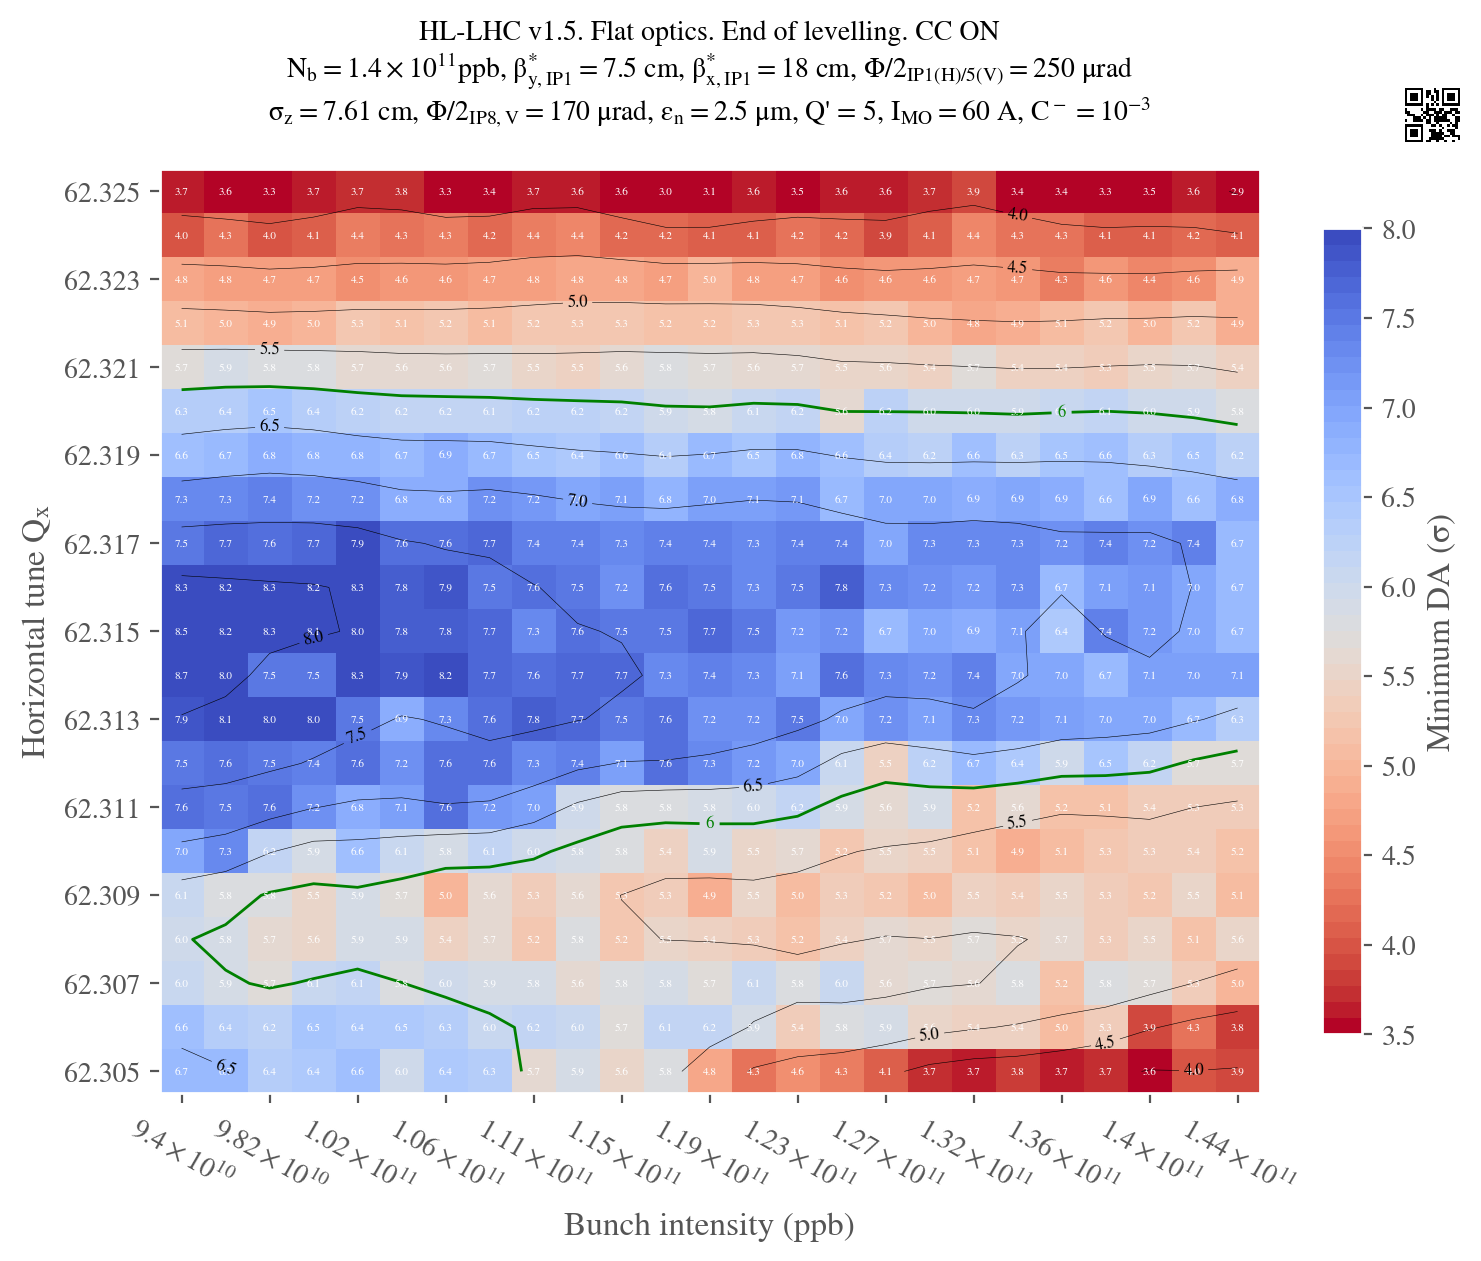

In [37]:
# Function to convert floats to scientific latex format
def latex_float(f):
    float_str = "{0:.3g}".format(f)
    if "e" in float_str:
        base, exponent = float_str.split("e")
        return r"${0} \times 10^{{{1}}}$".format(base, int(exponent))
    else:
        return float_str


def plot_heatmap(df_to_plot):
    # Get numpy array from dataframe
    data_array = df_to_plot.to_numpy()

    cmap = matplotlib.cm.get_cmap("coolwarm_r", 50)
    cmap.set_bad("w")

    fig, ax = plt.subplots(figsize = (10, 6))
    im = ax.imshow(data_array, cmap=cmap, vmin=3.5, vmax=8)
    ax.invert_yaxis()

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(df_to_plot.columns))[::2], labels=[latex_float(f) for f in df_to_plot.columns[::2]])
    ax.set_yticks(np.arange(len(df_to_plot.index))[::2], labels=df_to_plot.index[::2])

    # Loop over data dimensions and create text annotations.
    for i in range(len(df_to_plot.index)):
        for j in range(len(df_to_plot.columns)):
            text = ax.text(
                j, i, f"{data_array[i, j]:.1f}", ha="center", va="center", color="white", fontsize=4
            )

    # Smooth data for contours
    data_smoothed_copy = np.copy(data_array)
    data_smoothed_copy[np.isnan(data_smoothed_copy)] = 0
    
    # Extend the data to avoid contour lines being cut off
    #data_smoothed_copy = np.pad(data_smoothed_copy, pad_width=1, mode="edge")
    data_smoothed_copy = gaussian_filter(data_smoothed_copy, 0.9)

    # Plot contours
    CSS = ax.contour(
        np.arange(0, data_smoothed_copy.shape[1]),
        np.arange(0, data_smoothed_copy.shape[0]),
        data_smoothed_copy,
        colors="black",
        levels=list(np.arange(3, 6, 0.5)) + list(np.arange(6.5, 10, 0.5)),
        linewidths=0.2,
    )
    ax.clabel(CSS, inline=True, fontsize=6)
    CS2 = ax.contour(
        np.arange(0, data_smoothed_copy.shape[1]),
        np.arange(0, data_smoothed_copy.shape[0]),
        data_smoothed_copy,
        colors="green",
        levels=[6],
        linewidths=1,
    )
    ax.clabel(CS2, inline=1, fontsize=6)


    ax.set_title(
        "HL-LHC v1.5. Flat optics. End of levelling. CC ON"
        + "\n"
        + f"$N_b = $"
        + latex_float(1.4e11)
        + "ppb, "
        + r"$\beta^{*}_{y,IP1} = 7.5$ cm"
        + ", "
        + r"$\beta^{*}_{x,IP1} = 18$ cm"
        + ", "
        + r"$\Phi/2_{IP1(H)/5(V)} = 250$ $\mu rad$"
        + "\n"
        + r"$\sigma_{z} = 7.61$ $cm$"
        + ", "
        + r"$\Phi/2_{IP8,V} = 170$ $\mu rad$"
        + ", "
        + r"$\epsilon_{n} = 2.5$ $\mu m$"
        + ", "
        + r"Q' = 5"
        + ", "
        + r"$I_{MO} = 60$ $A$"
        + ", "
        + r"$C^-=10^{-3}$"
        + "\n",
        fontsize=10,
    )
    ax.set_xlabel("Bunch intensity (ppb)")
    ax.set_ylabel("Horizontal tune " + r"$Q_x$")
    #ax.set_xlim(0 - 0.5, data_array.shape[1] - 0.5)
    #ax.set_ylim(0 - 0.5, data_array.shape[0] - 0.5)

    # Ticks on top
    #ax.xaxis.tick_top()
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30)#, ha="right", rotation_mode="anchor")

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, fraction=0.026, pad=0.04)
    cbar.ax.set_ylabel("Minimum DA (" + r"$\sigma$" + ")", rotation=90, va="bottom", labelpad=15)
    plt.grid(visible=None)

    # Add QR code
    link = "TO ADD"
    fig = add_QR_code(fig, link)

    plt.savefig("plots/output_" + STUDY_NAME + ".pdf", bbox_inches="tight")
    plt.show()


plot_heatmap(df_to_plot)

### Copy all files used for the study on EOS

In [7]:
if SAVE_STUDY_EOS:

    path_study = "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/"
    path_EOS = "/eos/home-c/cdroin/save_simulations/"
    path_archive = path_EOS + STUDY_NAME + '/'

    ### Rebuild structue of the study on EOS
    try:
        os.mkdir(path_archive)
    except FileExistsError:
        print("Directory already exists, continue...")

    # Copy all master jobs
    shutil.copytree(path_study + "master_jobs",
                    path_archive + "master_jobs",
                    dirs_exist_ok=True)

    # Copy analysis
    suffix_analysis = "analysis/tune_scan/analysis_" + STUDY_NAME + ".ipynb"
    path_source_analysis = path_study + suffix_analysis
    path_destination_analysis = path_archive + suffix_analysis
    os.makedirs(os.path.dirname(path_destination_analysis), exist_ok=True)
    shutil.copy(path_source_analysis, path_destination_analysis)

    # Copy scripts to generate and analyse the scan
    suffix_scripts = ["001_make_folders_" + STUDY_NAME + ".py",
                        "002_chronjob.py",
                        "003_postprocessing.py"]
    for suffix in suffix_scripts:
        path_source = path_study + suffix
        path_destination = path_archive + suffix
        shutil.copy(path_source, path_destination)

    # Copy scan
    print('Start copying scan, this may take a while...')
    shutil.copytree(path_study + "scans/" + STUDY_NAME,
                    path_archive + "/scans/" + STUDY_NAME,
                    dirs_exist_ok=True)

Directory already exists, continue...
Start copying scan, this may take a while...


In [8]:
if SAVE_STUDY_EOS:

    # Convert the archive to a zip file, and export to EOS
    shutil.make_archive(path_archive,
                        'zip',
                        path_EOS,
                        path_archive.split('/')[-1])

RuntimeError: File size unexpectedly exceeded ZIP64 limit

In [ ]:
if SAVE_STUDY_EOS:
    # Delete the folder archive
    shutil.rmtree(path_archive)